### **Sales Analysis**

AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to: 1) Determine the states that are generating the highest revenues and 2) Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same. Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import plotly.express as px
import mpld3


In [ ]:
pip install mpld3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 4.0 MB/s eta 0:00:00


In [ ]:
df = pd.read_excel('1_ausapparalsales4thqrt2020.xlsx')
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


###**Describe Dataset**


**Date:**

This column represents the date on which sales data was recorded.
It is in the datetime format, ensuring consistency and ease of date-based analysis.
The date range in the sample data spans from October 1, 2020, and onwards.


The **'Time' **column captures the time of day when sales data was recorded, categorized as "Morning," "Afternoon," or "Evening."
This column provides insight into the temporal distribution of sales transactions throughout the day.


The **'State'** column contains information about the geographical location where the sales data was recorded, represented by state codes (e.g., "WA" for Western Australia).
It indicates the region or location of the sales activities, which can be valuable for regional analysis.


The **'Group' **column categorizes sales data into different groups or categories, such as "Kids," "Men," "Women," and "Seniors."
This column likely represents the target customer demographic or product categories.
It allows for segmenting sales data based on customer groups for more focused analysis.


The **'Unit'** column indicates the number of units or items sold in each sales transaction.
In the sample data, it ranges from 3 to 15 units, depending on the specific transaction.
Understanding unit sales is important for assessing product popularity and inventory management.
Sales:

The **'Sales'** column represents the total sales revenue for each transaction, measured in the currency (e.g., USD or another currency) used for these transactions.
In the sample data, sales figures range from 7,500 to 37,500.
This column provides insights into the financial aspect of the sales data and is crucial for revenue analysis.


###**Data Wrangling**

1.Ensure that the data is clean and that there is no missing or incorrect data. Inspect the data manually for missing/incorrect data using the functions isna(), and notna().

In [ ]:
# Check for missing values in the entire DataFrame
# Count missing values in each column
missing_values_count = df.isna().sum()
print(missing_values_count) #isna() function is used to check for missing or null values in a DataFrame

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [ ]:
m_val = df.notna() #The notna()functiont is used to check for non-missing or non-null values in a DataFrame or Series
print(m_val)

      Date  Time  State  Group  Unit  Sales
0     True  True   True   True  True   True
1     True  True   True   True  True   True
2     True  True   True   True  True   True
3     True  True   True   True  True   True
4     True  True   True   True  True   True
...    ...   ...    ...    ...   ...    ...
7555  True  True   True   True  True   True
7556  True  True   True   True  True   True
7557  True  True   True   True  True   True
7558  True  True   True   True  True   True
7559  True  True   True   True  True   True

[7560 rows x 6 columns]


In [ ]:
df.duplicated().sum() #duplicated() function is used to identify and mark duplicate rows in a DataFrame.

0

In [ ]:
#Cheak Logical Value
if( df['Sales']< 0).any():
    print("Error :'Sales' cannot have negtive value ." )
else:
    print ("No error found in Sales")

No error found in Sales


In [ ]:
re_name_state = {
    'SA': 'South Australia',
    'NSW': 'New South Wales',
    'VIC': 'Victoria',
    'QLD': 'Queensland',
    'WA': 'Western Australia',
    'TAS': 'Tasmania',
    'NT': 'Northern Territory'
}
df['State'] = df['State'].str.strip().replace(re_name_state)

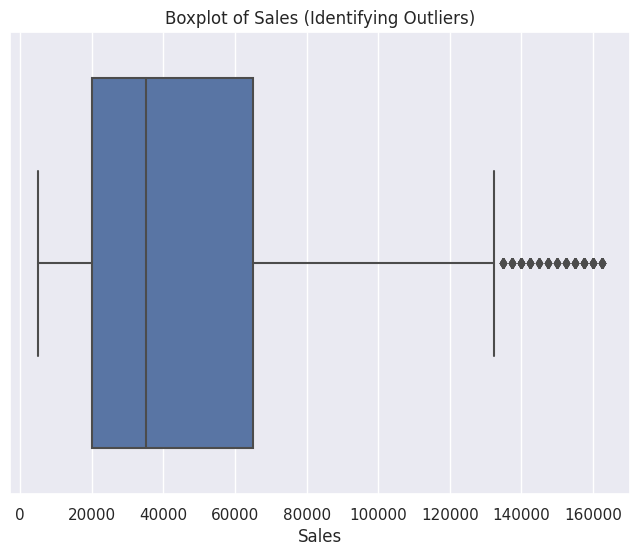

In [ ]:
# Create a boxplot to identify outliers using seborn libery
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales']
)
plt.title('Boxplot of Sales (Identifying Outliers)')
plt.show()

**Note that, all columns have 7560 rows, and there are no missing values, duplicated rows, or irrational values,Just to change the abbreviation of the names of the states to their full names within the states column**

2.Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).

Ans : When the missing data is minimal and doesn't significantly impact the analysis, you can consider dropping the rows or columns with missing values.

3.Select an appropriate Data Wrangling approach — data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)

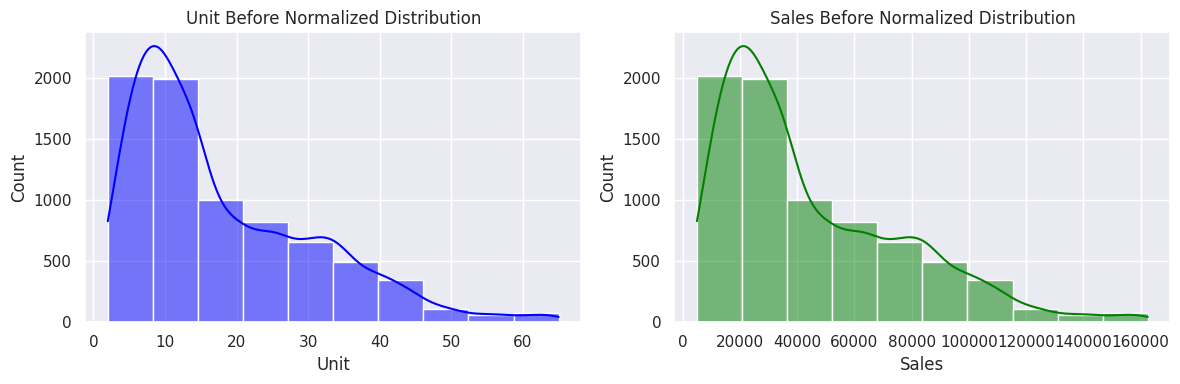

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot histograms for 'Unit before normalized' and 'sales before normalized'
sns.histplot(df['Unit'], ax=axes[0], kde=True, color='blue', bins=10)
axes[0].set_title('Unit Before Normalized Distribution')
sns.histplot(df['Sales'], ax=axes[1], kde=True, color='green', bins=10)
axes[1].set_title('Sales Before Normalized Distribution')

plt.tight_layout()
plt.show()

In [ ]:
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

# Apply Min-Max scaling to the 'Unit' and 'Sales' columns
df['Unit_normalized'] = min_max_scaling(df['Unit'])
df['Sales_normalized'] = min_max_scaling(df['Sales'])

# Now, the 'Unit_normalized' and 'Sales_normalized' columns contain the normalized values

print(df)

           Date        Time State     Group  Unit  Sales  Year  Week  Month  \
0    2020-10-01     Morning    WA      Kids     8  20000  2020    40     10   
1    2020-10-01     Morning    WA       Men     8  20000  2020    40     10   
2    2020-10-01     Morning    WA     Women     4  10000  2020    40     10   
3    2020-10-01     Morning    WA   Seniors    15  37500  2020    40     10   
4    2020-10-01   Afternoon    WA      Kids     3   7500  2020    40     10   
...         ...         ...   ...       ...   ...    ...   ...   ...    ...   
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000  2020    53     12   
7556 2020-12-30     Evening   TAS      Kids    15  37500  2020    53     12   
7557 2020-12-30     Evening   TAS       Men    15  37500  2020    53     12   
7558 2020-12-30     Evening   TAS     Women    11  27500  2020    53     12   
7559 2020-12-30     Evening   TAS   Seniors    13  32500  2020    53     12   

      Unit_normalized  Sales_normalized  
0        

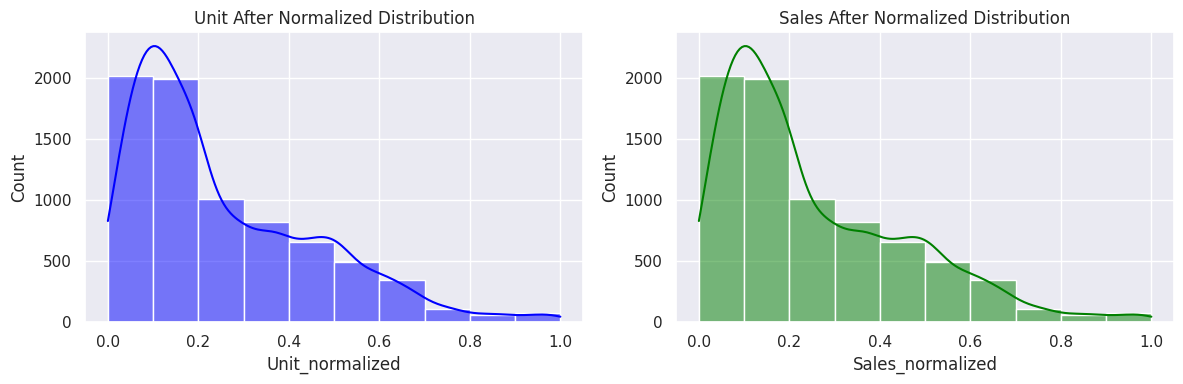

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot histograms for 'Unit_normalized' and 'Sales_normalized'
sns.histplot(df['Unit_normalized'], ax=axes[0], kde=True, color='blue', bins=10)
axes[0].set_title('Unit After Normalized Distribution')
sns.histplot(df['Sales_normalized'], ax=axes[1], kde=True, color='green', bins=10)
axes[1].set_title('Sales After Normalized Distribution')

plt.tight_layout()
plt.show()

## **Data Analysis**

Q1:Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.).

In [ ]:
# Using the pandas describe
# Using built - in meathods and functions
# Descriptive Statistical Analysis
print("Descriptive Statistics for Sales:")
the_mean = df['Sales'].mean() # calcate the mean on sales column.
print("The Mean of Sales is :",the_mean)

the_median = df['Sales'].median() # calcate the median on sales column.
print("The Median of sales is :", the_median)

the_mode =st.mode(df['Sales'])  # calcate the mode on Sales using statistic library.
print("The Mode on Sales is :", the_mode)

the_range = df['Sales'].max() - df['Sales'].min() # getting the range out of sales
print("The Range on Sales is :",the_range)

the_std = df['Sales'].std() # calcate the standard deviation
print("The Standard Deviation:",the_std)

Descriptive Statistics for Sales:
The Mean of Sales is : 45013.5582010582
The Median of sales is : 35000.0
The Mode on Sales is : 22500
The Range on Sales is : 157500
The Standard Deviation: 32253.506943966073


In [ ]:
print("\nDescriptive Statistics for Unit:")
unit_mean = int(df['Unit'].mean() )  #calcate the mean on unit column.
print("The Mean:", unit_mean)

unit_median = int(df['Unit'].median())# calcate the median on unit column.
print("The Median:", unit_median)

unit_mode = st.mode(df['Unit'])  # calcate the mode on unit using statistic library.
print("The Mode:", unit_mode)

unit_std = int(df['Unit'].std())  # calcate the standard deviation
print("The Standard Deviation:", unit_std)

#converte to int becuese the unit discrete


Descriptive Statistics for Unit:
The Mean: 18
The Median: 14
The Mode: 9
The Standard Deviation: 12


Q2: Determine which group is generating the highest sales, and which group is generating the lowest sales.

In [ ]:
group_sales = df.groupby('Group')['Sales'].sum()
print(group_sales)
highest_group = group_sales.max() #max()function in pandas is used to find the index label (or row label) of the maximum value in a Series or DataFrame.
print("\n The Group of Highest Sales:", highest_group)
lowest_group = group_sales.min()#min(). It is used to find the index label (or row label) of the minimum value
print(" The Group of Lowest Sales:", lowest_group)

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64

 The Group of Highest Sales: 85750000
 The Group of Lowest Sales: 84037500


In [ ]:
fig = px.bar(df, x='Group', y='Sales')
fig.update_layout(title="The Group of Highest and Lowest Sales",title_x=0.5, title_y=0.9)
fig.show()

Q3:Determine which state is generating the highest sales, and which state is generating the lowest sales

In [ ]:
state_sales = df.groupby('State')['Sales'].sum()
print(state_sales)
highest_state = state_sales.max()
print("The State of Highest Sales:",highest_state)
lowest_state = state_sales.min()
print("The State of Lowest Sales:", lowest_state)

State
New South Wales        74970000
Northern Territory     22580000
Queensland             33417500
South Australia        58857500
Tasmania               22760000
Victoria              105565000
Western Australia      22152500
Name: Sales, dtype: int64
The State of Highest Sales: 105565000
The State of Lowest Sales: 22152500


In [ ]:
fig2 = px.bar(df, x='State', y='Sales')
fig2.update_layout(title="The State of Highest and Lowest Sales",title_x=0.5, title_y=0.9)
fig2.show()

Q4:Generate weekly, monthly and quarterly reports for the analysis made.

In [ ]:
# Generate Weekly, Monthly, and Quarterly Reports
df['Date'] = pd.to_datetime(df['Date'])  # Ensure the 'Date' column is in datetime format
df.set_index('Date', inplace=True)

print("\nWeekly Report ")
weekly_report = df['Sales'].resample('W').sum()
print(weekly_report)


print("\nMonthly Sales Report:")
monthly_report = df['Sales'].resample('M').sum()
print(monthly_report)

print("\nQuarterly Sales Report:")
quarterly_report = df['Sales'].resample('Q').sum()
print(quarterly_report)


Weekly Report 
Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

Monthly Sales Report:
Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64

Quarterly Sales Report:
Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64


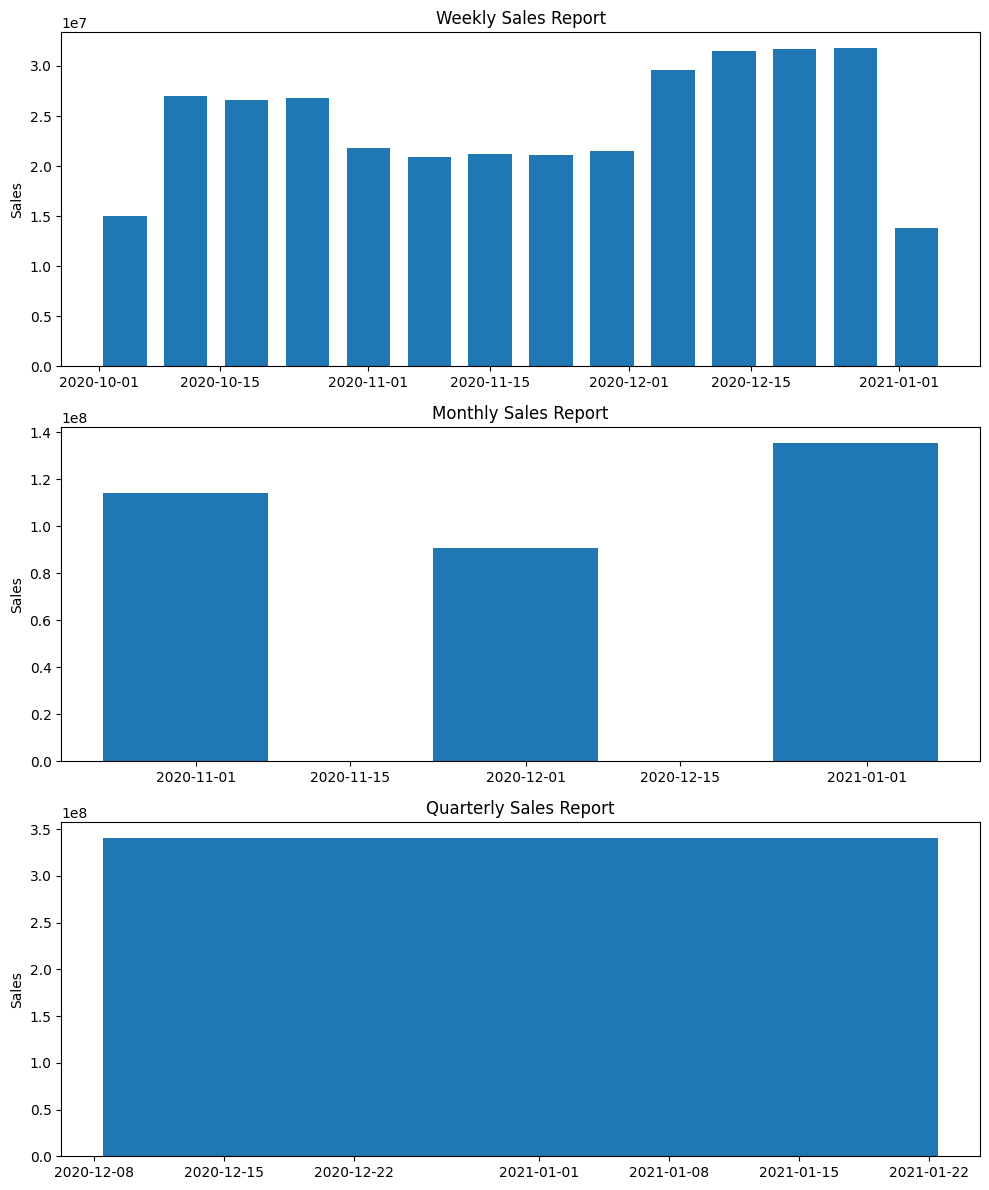

In [ ]:

# Create bar charts for the reports
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

#Weekly Report Bar Chart
axes[0].bar(weekly_report.index, weekly_report, width=5)
axes[0].set_ylabel('Sales')
axes[0].set_title('Weekly Sales Report')



# Monthly Report Bar Chart
axes[1].bar(monthly_report.index, monthly_report, width=15)
axes[1].set_ylabel('Sales')
axes[1].set_title('Monthly Sales Report')

# Quarterly Report Bar Chart
axes[2].bar(quarterly_report.index, quarterly_report, width=45)
axes[2].set_ylabel('Sales')
axes[2].set_title('Quarterly Sales Report')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()




### **Data Visualization**

Q1:State-wise sales analysis for different groups (kids, women, men, and seniors)

HTML file saved as 'sales_analysis.html'. Open it in a web browser to view the plot.


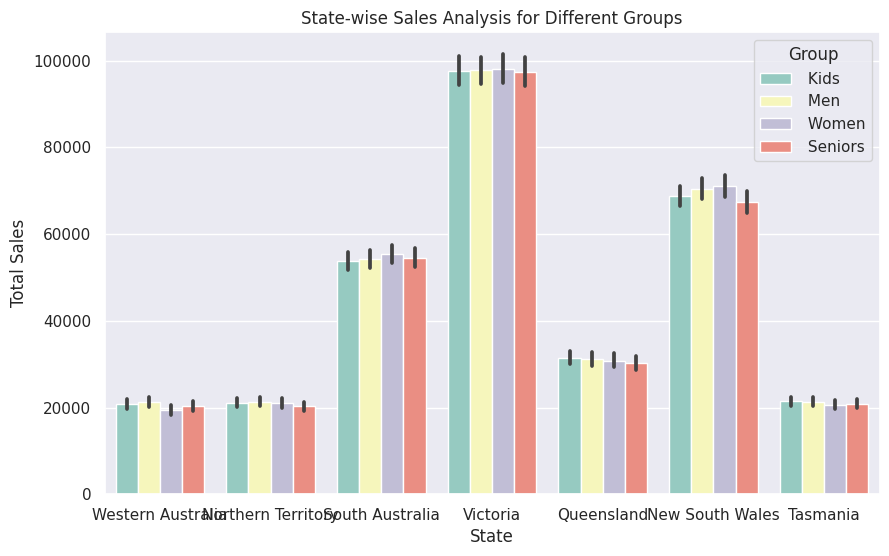

In [ ]:
# Set the style of the visualization
sns.set(style="darkgrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df, palette='Set3')
plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Total Sales')
# plt.xticks(rotation=45)
#plt.tight_layout()
# Save the Seaborn plot as an image (PNG)
plt.savefig('sales_analysis.png', format='png')

# Create an HTML file and embed the image
html_content = f'<img src="sales_analysis.png">'
with open('sales_analysis.html', 'w') as f:
    f.write(html_content)

# Display the path to the HTML file
print("HTML file saved as 'sales_analysis.html'. Open it in a web browser to view the plot.")
plt.show()

Q2 :Group-wise sales analysis (kids, women, men, and seniors) across different states

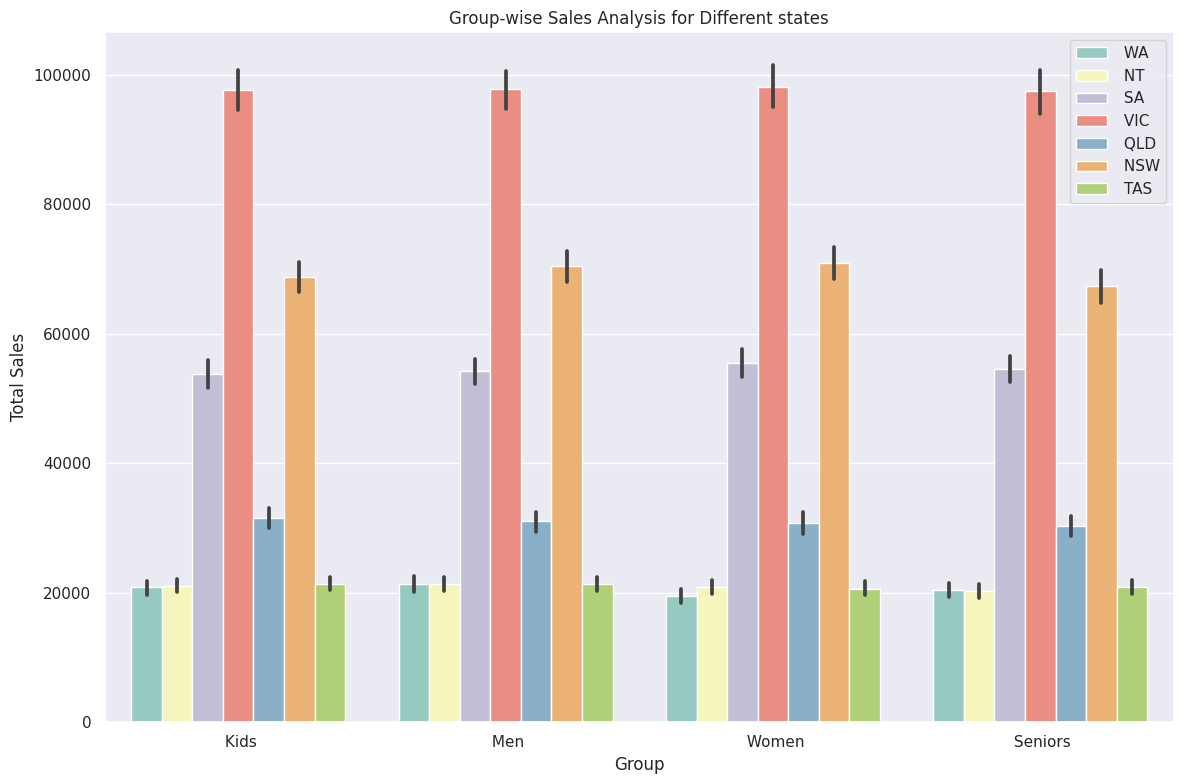

In [ ]:
#Plot the sales analysis with respect to groups across different states
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", color_codes=True)
sns.barplot(x='Group', y='Sales', hue='State', data=df, palette='Set3')
plt.title('Group-wise Sales Analysis for Different states')
plt.xlabel('Group')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.legend(loc = 'upper right')
plt.show()

Q3 :Time-of-the-day analysis: during which time of the day are sales the highest, and lowest

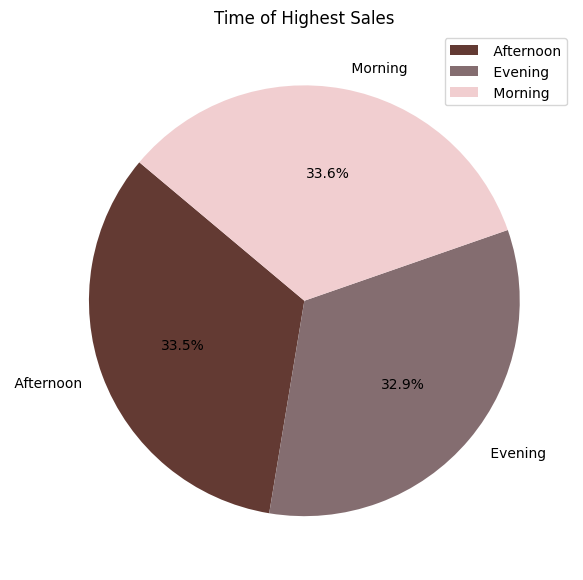

In [ ]:
# Group by 'Time' and calculate the sum of 'Sales'
segment_sales = df.groupby('Time')['Sales'].sum()

# Define custom colors for the pie chart segments
custom_colors = ['#633a33', '#846d70', '#f1ced0', '#f1ced0']  # Replace these colors with your desired ones

plt.figure(figsize=(6, 9))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Time of Highest Sales')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

### **Dashboard**

The dashboard must contain daily, weekly, monthly and quarterly charts.
 (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)


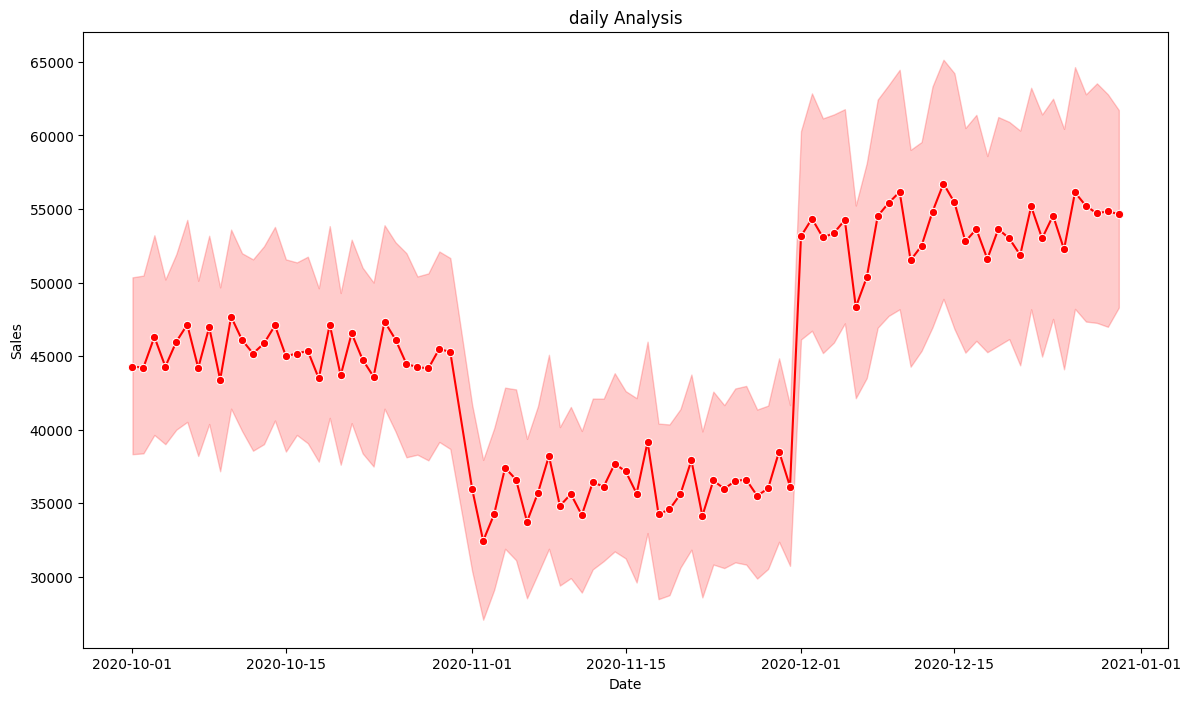

In [ ]:
#Daily analysis using lineplot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='Sales', marker='o', color = 'Red')
plt.title("daily Analysis")
plt.show()

In [ ]:
#import calendar
import datetime as dt
import seaborn as sns
#import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:

# Group by 'Year' and 'Week', calculate the sum of 'Sales'
weekly_grouped = df.groupby(['Date'])['Sales'].sum()

# Reset the index to make it easier to plot
#weekly_grouped = weekly_grouped.reset_index()

# Average weekly sales
weekly_avg = df.groupby([pd.Grouper(key='Date', freq='W')]).mean(numeric_only=True)

# monthly
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by 'Year' and 'Month', calculate the sum of 'Sales'
monthly_grouped = df.groupby(['Year', 'Month'])['Sales'].sum()

# Reset the index to make it easier to plot
#monthly_grouped = monthly_grouped.reset_index()

# Average monthly sales
monthly_avg = df.groupby([pd.Grouper(key='Date', freq='M')]).mean(numeric_only=True)

# Create subplots for weekly and monthly analysis
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot average weekly sales
ax1 = axes[0]
sns.lineplot(x=weekly_avg.index, y=weekly_avg['Sales'].values, ax=ax1, marker='o', color = 'green')
ax1.set_title('Average Weekly Sales')
ax1.set_xlabel('Week')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-W%U"))

# Plot average monthly sales
ax2 = axes[1]
sns.lineplot(x=monthly_avg.index, y=monthly_avg['Sales'].values, ax=ax2, marker='o', color = 'brown')
ax2.set_title('Average Monthly Sales')
ax2.set_xlabel('Month')
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.tight_layout()
plt.show()

KeyError: ignored

In [ ]:
df.columns

Index(['Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

Final report:
results and suggestions:
According to the data analysis above, we concluded that the highest revenue is in state VIC, on the other hand, the
following states scored the lowest revenue : WA, NT , QLD , and TAS, therefore we suggest the following plan.
Suggested programs to increase revenue :
1. Work on the Sales and Marketing Strategies.
2. Enhance Product and Service Expansion.
3. Create Customer Loyalty Programs.
4. Optamize Data Analytics and Business Intelligence.
5. Offer Discounts and Promotions